# Car Prices Analysis

## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset into Python

In [2]:
carPricesData = pd.read_csv("CarPricesData.csv", sep=',', encoding='latin-1')
print('Data BEFORE removing duplicates', carPricesData.shape)

carPricesData = carPricesData.drop_duplicates()
print('Data AFTER removing duplicates', carPricesData.shape)

carPricesData.head()

Data BEFORE removing duplicates (1436, 10)
Data AFTER removing duplicates (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


## Problem statement
#### Create a ML model which can predict the price of the car
- Target Variable: Price

## Type of Machine Learning
#### As the target variable is a continuous variable, we need to create a Supervised ML regression model

## Distribution of target variable

<Axes: >

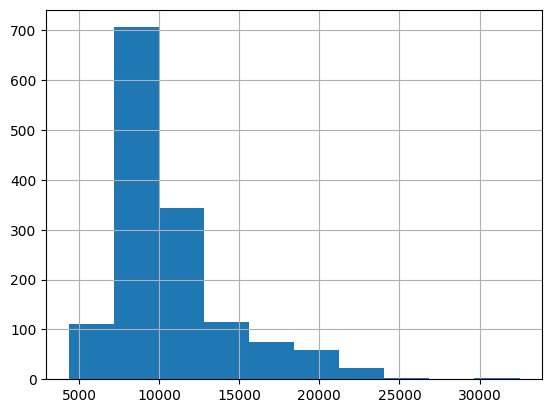

In [3]:
carPricesData['Price'].hist()

The distribution of the target variable is satisfactory hence we can move forward and do the further analysis

## Basic data exploration

In [4]:
carPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [5]:
carPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [6]:
carPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [7]:
carPricesData.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

## Removing unwanted columns
There are no unwanted columns found in this dataset

## Visual exploratory data analysis (Uni-variate analysis)

- Continuous Variables: Histogram
- Categorical Variables: Bar / pie / line

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'KM'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

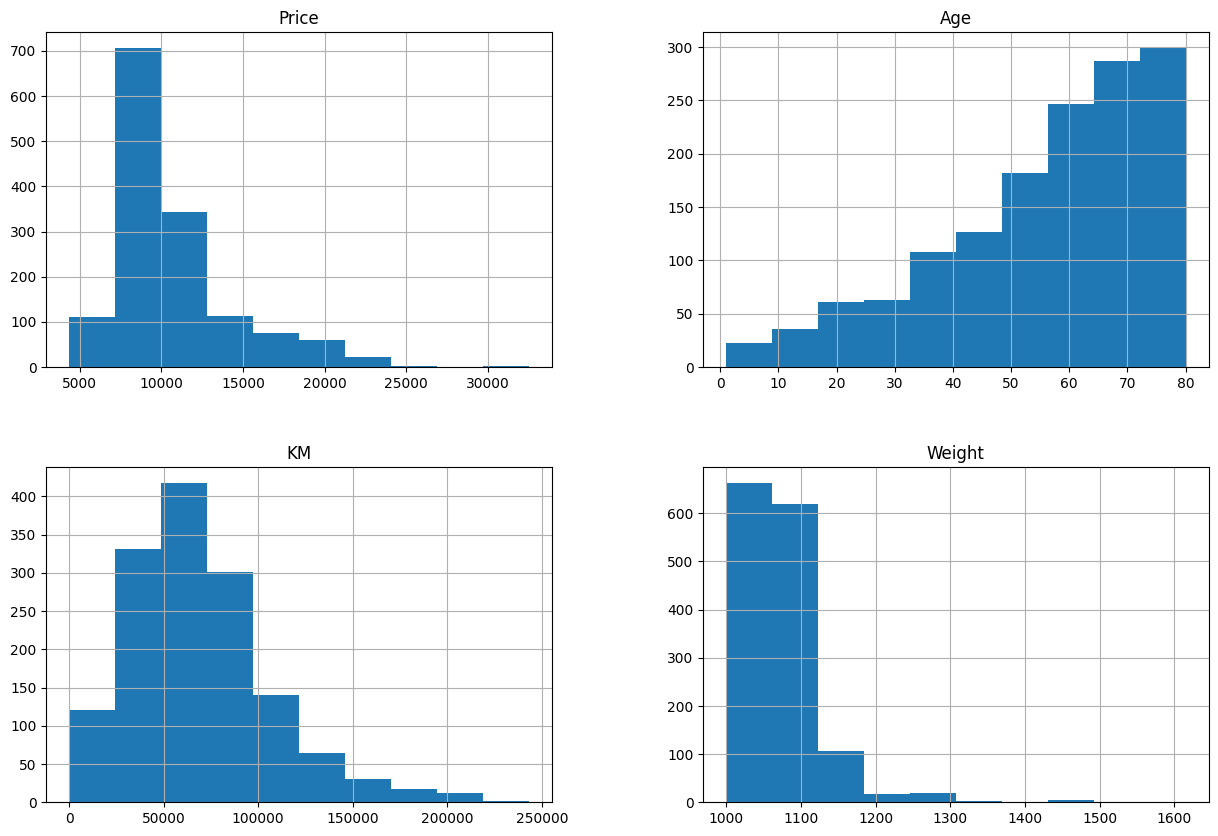

In [8]:
# Continuous Variables

carPricesData.hist(['Price', 'Age', 'KM', 'Weight'], figsize=(15,10))

Conclusion

- There seems to be some outliers in the Price and Weight charts and need to be treated, rest all of them have good distribution and will be analysed further

In [9]:
# Categorical Variable

# Defining a function to plot all the charts in one go

def plotBarCharts(inpData, colsToPlot):
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar Plots of: '+ str(colsToPlot))
    
    for barPlot, plotArea in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(barPlot).size().plot(kind='bar', ax=subplot[plotArea])    

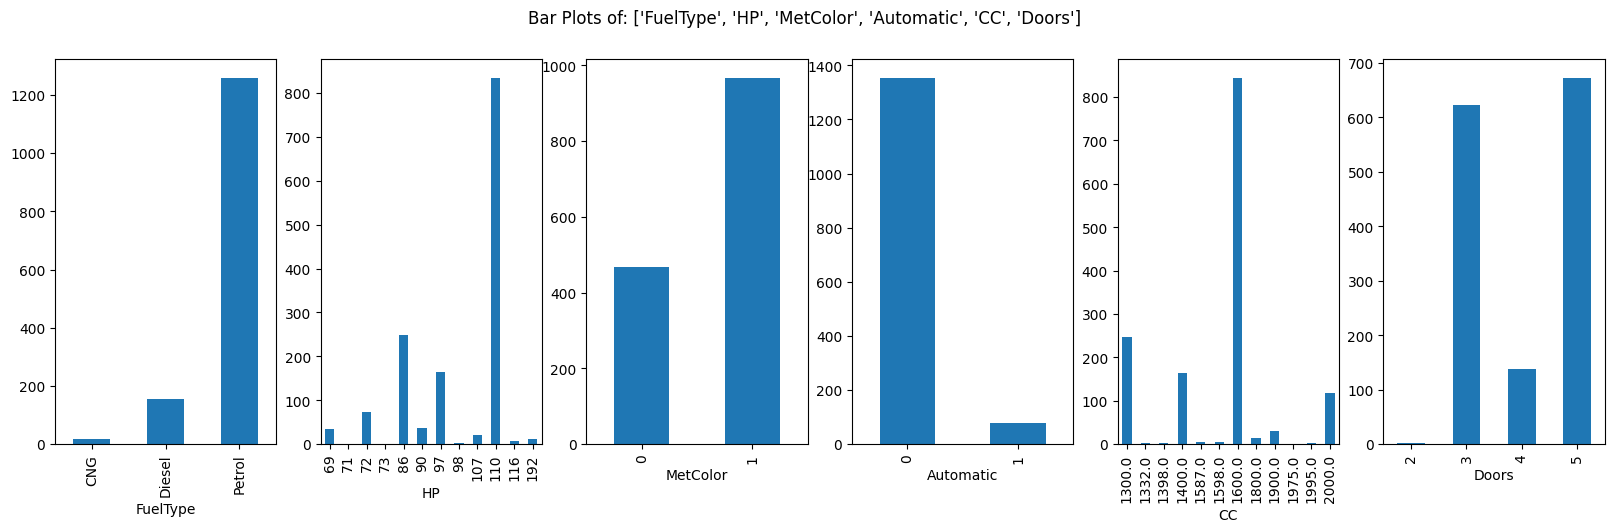

In [10]:
categoricalVar = ['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

plotBarCharts(carPricesData, categoricalVar)

Conclusion

- All the categorical variables are selected for further analysis

## Outlier treatment

<Axes: >

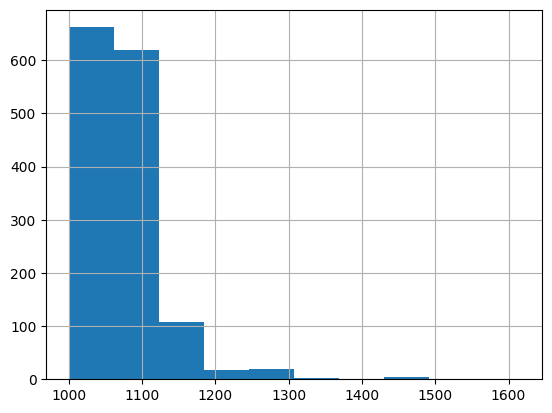

In [11]:
# Treating outlier for Weight column

carPricesData['Weight'].hist()

In [12]:
len(carPricesData['Weight'][carPricesData['Weight']>1400])

5

In [13]:
carPricesData['Weight'][carPricesData['Weight']<1400].sort_values(ascending=False).head()

112    1320.0
138    1320.0
115    1280.0
119    1275.0
68     1275.0
Name: Weight, dtype: float64

In [14]:
carPricesData['Weight'][carPricesData['Weight']>1400] = 1320

<Axes: >

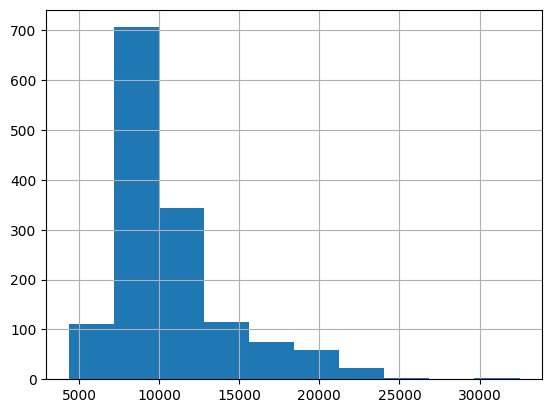

In [15]:
# Price column

carPricesData['Price'].hist()

In [16]:
len(carPricesData['Price'][carPricesData['Price']>29000])

3

In [17]:
carPricesData['Price'][carPricesData['Price']<29000].sort_values(ascending=False).head()

115    24990
112    24950
147    24500
141    23950
171    23750
Name: Price, dtype: int64

In [18]:
carPricesData['Price'][carPricesData['Price']>29000] = 24990

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

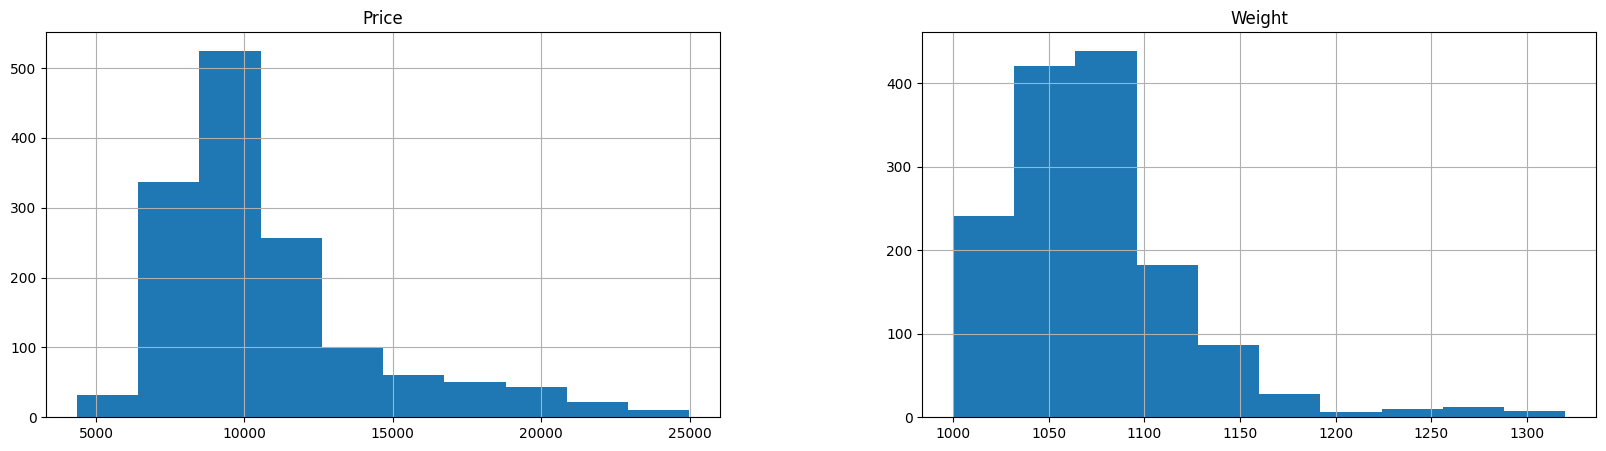

In [19]:
# Visualzing after outlier treatment

carPricesData[['Price', 'Weight']].hist(figsize=(20,5))

## Missing values treatment

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64


<Axes: >

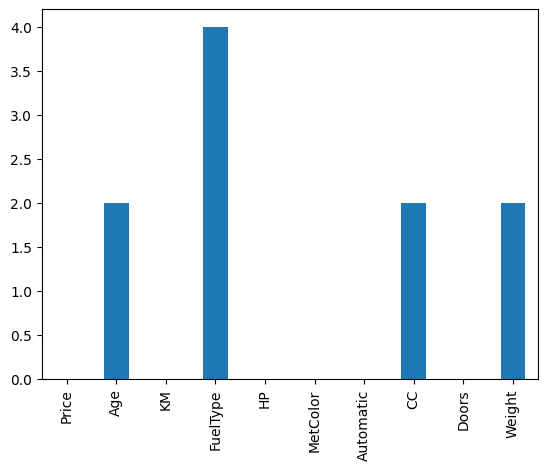

In [20]:
print(carPricesData.isnull().sum())
carPricesData.isnull().sum().plot(kind='bar')

In [21]:
carPricesData['Age'].fillna(carPricesData['Age'].median(), inplace=True)
carPricesData['Weight'].fillna(carPricesData['Weight'].median(), inplace=True)

In [22]:
carPricesData['FuelType'].fillna(carPricesData['FuelType'].mode()[0], inplace=True)
carPricesData['CC'].fillna(carPricesData['CC'].mode()[0], inplace=True)

In [23]:
carPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

## Feature analysis (Bi-variate analysis)

- Continuous vs Continuous: Scatter Plot
- Categorical vs Continuous: Box plot
- Categorical vs Categorical: Grouped bar plot

In [24]:
# Continuous vs Continuous

contVar = ['Age','KM','Weight']
target = 'Price'

# Defining a function to plot all the scatter plots at one go

def plotScatter(inpData, colsToPlot):
    
    fig, subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Scatter plots of: ' + str(colsToPlot))
    
    for scatterPlot, plotArea in zip(colsToPlot, range(len(colsToPlot))):
        inpData.plot.scatter(x=scatterPlot, y=target, ax=subplot[plotArea])

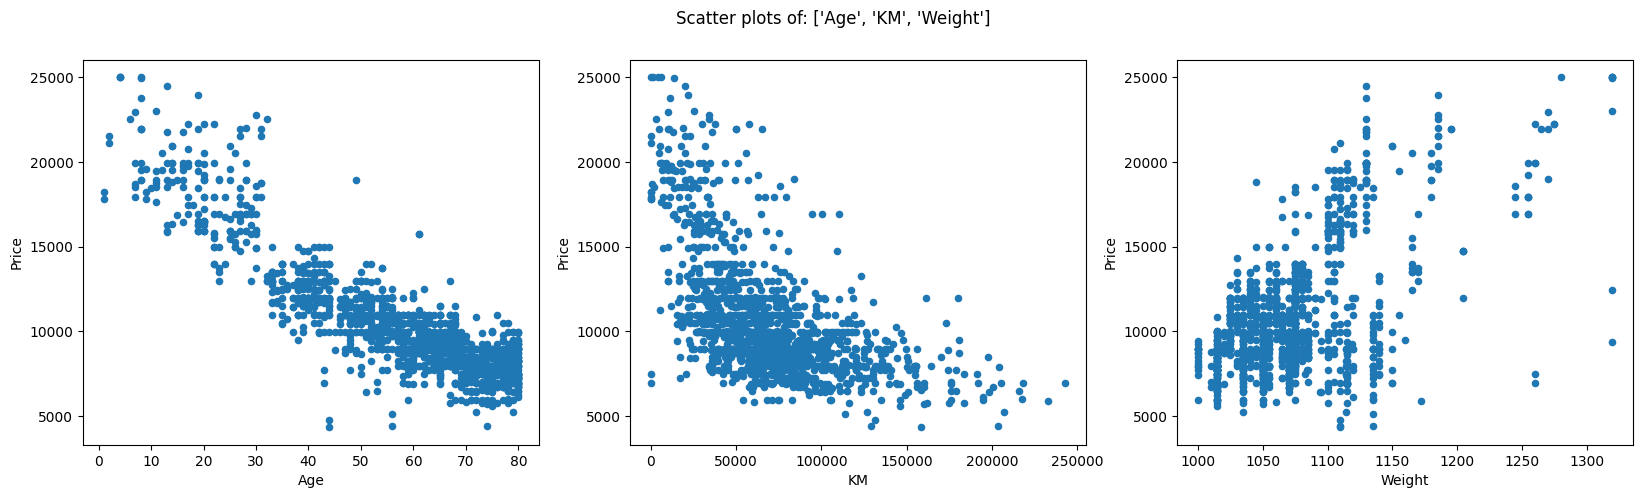

In [25]:
plotScatter(carPricesData, contVar)

In [26]:
# Statistical feature selection using Pearson's correlation

contVar = ['Price', 'Age','KM','Weight']
correlationData = carPricesData[contVar].corr()
correlationData

,Price,Age,KM,Weight
Price,1.000000,-0.880043,-0.573402,0.580007
Age,-0.880043,1.000000,0.502604,-0.488324
KM,-0.573402,0.502604,1.000000,-0.013607
Weight,0.580007,-0.488324,-0.013607,1.000000


In [27]:
# The standard threshold is >0.5
# In case there is no variable then we can adjust the threshold accordingly

correlationData['Price'][abs(correlationData['Price'])>0.5]

Price     1.000000
Age      -0.880043
KM       -0.573402
Weight    0.580007
Name: Price, dtype: float64

In [28]:
# Categorical vs Continuous

catgVar = ['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

# Defining a function so that we can plot the visuals at one go

def plotBox(inpData, colsToPlot):

    fig, subplot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Box Plots of: ' + str(colsToPlot))
    
    for boxPlot, plotArea in zip(colsToPlot, range(len(colsToPlot))):
        inpData.boxplot(column=target, by=boxPlot, ax=subplot[plotArea])

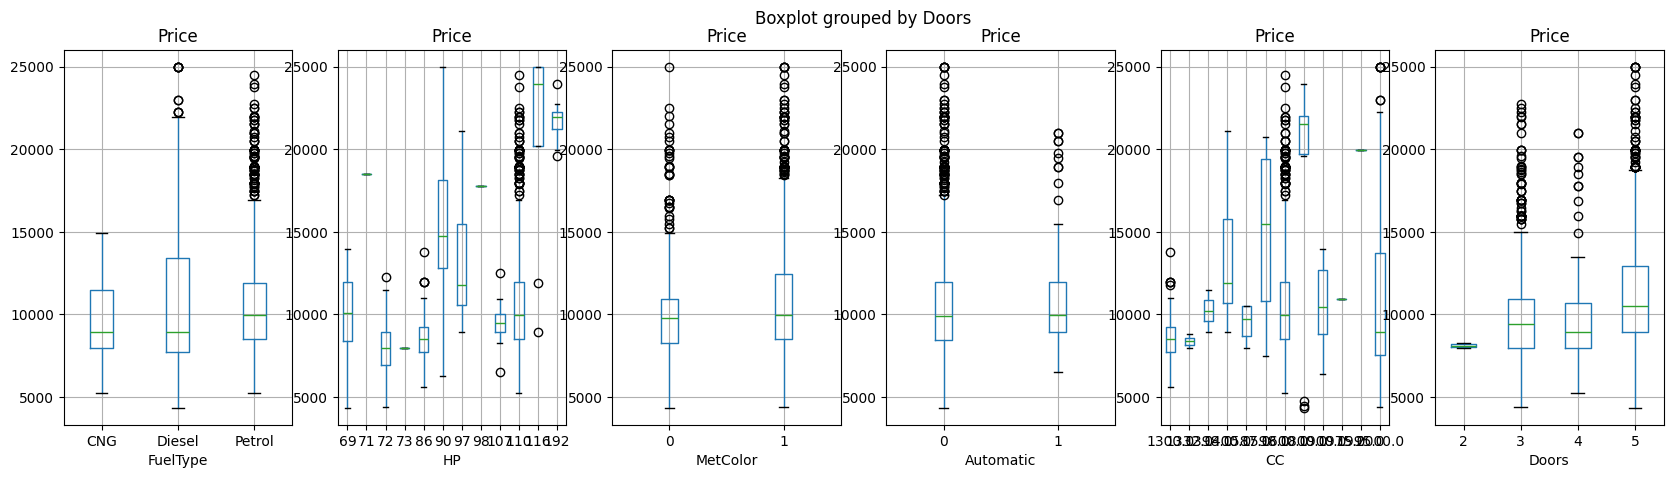

In [29]:
plotBox(carPricesData, catgVar)

In [30]:
# Statistical feature selection using ANOVA test

catgVar = ['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

# Defining a function to get the statistical values of all in one go

def functionAnova(inpData, targetVar, categoryVar):
    
    from scipy.stats import f_oneway
    
    selectedCols = []
    
    for pred in (categoryVar):
        groupedData = inpData.groupby(pred)[targetVar].apply(list)
        anova = f_oneway(*groupedData)

        if (anova[1] < 0.05):
            print(pred, 'is CORREALTED with', targetVar, '| Probability value: ', anova[1])
            selectedCols.append(pred)

        else:
            print(pred, 'is NOT CORREALTED with', targetVar, '| Probability value: ', anova[1])
        
    return selectedCols

In [31]:
functionAnova(carPricesData, target, catgVar)

FuelType is NOT CORREALTED with Price | Probability value:  0.13509668858708382
HP is CORREALTED with Price | Probability value:  1.9274014078136855e-103
MetColor is CORREALTED with Price | Probability value:  2.9082820205816128e-05
Automatic is NOT CORREALTED with Price | Probability value:  0.17860614078485976
CC is CORREALTED with Price | Probability value:  4.667580175740994e-49
Doors is CORREALTED with Price | Probability value:  1.0200265373934503e-12


['HP', 'MetColor', 'CC', 'Doors']

## Final predictors for ML

In [32]:
selectedColumns = ['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']
dataforML = carPricesData[selectedColumns]
dataforML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


## Data pre-processing

There is no categorical column which is in string format

In [33]:
dataforML_numeric = pd.get_dummies(dataforML)

dataforML_numeric['Price'] = carPricesData['Price']

dataforML_numeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


# Machine Learning

## Training and Testing data

In [34]:
dataforML_numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

## Simple Linear Regression 

y = mx + c

In [35]:
# Splitting the training and testing data

target = 'Price'
predictor = ['Age']

x = dataforML_numeric[predictor].values
y = dataforML_numeric[target].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 1)
(1004,)
(431, 1)
(431,)


In [36]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
LREG = regModel.fit(x_train, y_train)

prediction = LREG.predict(x_test)
df = pd.DataFrame(data=x_test, columns=predictor)
df['Original '+ target] = y_test
df['Predicted '+ target] = np.round(prediction)
print(df.head())

print('')

df['APE'] = abs((df['Original '+ target] - df['Predicted '+ target])/df['Original '+ target]) * 100
print(df.head())

print('')

MAPE = np.round(np.mean(df['APE']),1)
medianAPE = np.round(np.median(df['APE']),1)

meanAccuracy = 100 - MAPE
medianAccuracy = 100 - medianAPE

print('The mean accuracy of APE is', meanAccuracy)
print('The median accracy of APE is', medianAccuracy)

    Age  Original Price  Predicted Price
0  59.0            8900          10199.0
1  69.0            8250           8545.0
2  74.0            7750           7718.0
3  32.0           12995          14663.0
4  70.0            8950           8380.0

    Age  Original Price  Predicted Price        APE
0  59.0            8900          10199.0  14.595506
1  69.0            8250           8545.0   3.575758
2  74.0            7750           7718.0   0.412903
3  32.0           12995          14663.0  12.835706
4  70.0            8950           8380.0   6.368715

The mean accuracy of APE is 88.2
The median accracy of APE is 90.7


In [37]:
# R2 Score (Goodness of fit)
# Ideally should be between 0.6 - 0.95

from sklearn.metrics import r2_score
r2Score = r2_score(y_test, prediction)
print('The r2 score is', np.round(r2Score,2))

The r2 score is 0.78


In [38]:
# K fold cross validation

# Firstly we will define a function to calculate the accuracy
def accuracy(original, predicted):
    MAPE = np.mean(100 * abs((original - predicted)/original))
    return(100 - MAPE)


# After that we will make a custom scorer to get the cross validation score
from sklearn.metrics import make_scorer
customScorer = make_scorer(accuracy, greater_is_better=True)


# Running the k fold cross validation 
from sklearn.model_selection import cross_val_score
crossValScore = cross_val_score(regModel, x, y, cv=5, scoring=customScorer)
print(crossValScore)
print('The final average cross validation score is',np.round(np.mean(crossValScore),1))

[83.00046464 85.63167889 87.99507421 90.07378511 83.20455973]
The final average cross validation score is 86.0


In [39]:
LREG.coef_ #m

array([-165.34817438])

In [40]:
LREG.intercept_ #c

19954.149812603733

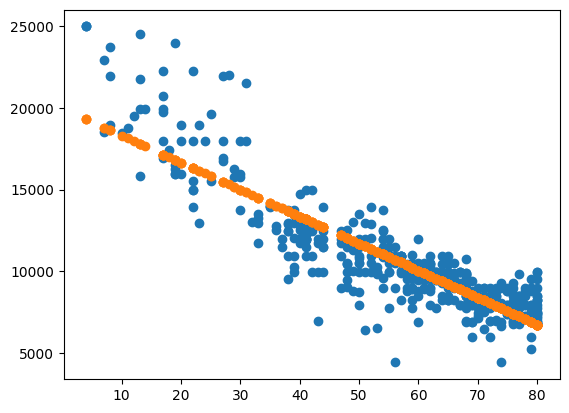

In [41]:
# Plotting the Simple Linear regression

import matplotlib.pyplot as plt

plt.scatter(x=df[predictor], y=df['Original Price'])
plt.scatter(x=df[predictor], y=df['Predicted Price'])

## Multiple Linear Regression
y = m1x1 + m2x2 + m3x3.... + c

In [42]:
# Splitting the training and testing data

target = 'Price'
predictor = ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

x = dataforML_numeric[predictor].values
y = dataforML_numeric[target].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [43]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
LREG = regModel.fit(x_train, y_train)

prediction = LREG.predict(x_test)
df = pd.DataFrame(data=x_test, columns=predictor)
df['Original '+ target] = y_test
df['Predicted '+ target] = np.round(prediction)
print(df.head())

print('')

df['APE'] = abs((df['Original '+ target] - df['Predicted '+ target])/df['Original '+ target]) * 100
print(df.head())

print('')

MAPE = np.round(np.mean(df['APE']),1)
medianAPE = np.round(np.median(df['APE']),1)

meanAccuracy = 100 - MAPE
medianAccuracy = 100 - medianAPE

print('The mean accuracy of APE is', meanAccuracy)
print('The median accracy of APE is', medianAccuracy)

    Age        KM  Weight     HP  MetColor      CC  Doors  Original Price  \
0  59.0   36954.0  1050.0  110.0       1.0  1600.0    3.0            8900   
1  69.0   44826.0  1075.0  110.0       0.0  1600.0    5.0            8250   
2  74.0  120196.0  1050.0  110.0       1.0  1600.0    3.0            7750   
3  32.0   29198.0  1060.0   97.0       1.0  1400.0    5.0           12995   
4  70.0   68000.0  1045.0   86.0       1.0  1300.0    3.0            8950   

   Predicted Price  
0          10680.0  
1           9759.0  
2           7527.0  
3          14029.0  
4           8671.0  

    Age        KM  Weight     HP  MetColor      CC  Doors  Original Price  \
0  59.0   36954.0  1050.0  110.0       1.0  1600.0    3.0            8900   
1  69.0   44826.0  1075.0  110.0       0.0  1600.0    5.0            8250   
2  74.0  120196.0  1050.0  110.0       1.0  1600.0    3.0            7750   
3  32.0   29198.0  1060.0   97.0       1.0  1400.0    5.0           12995   
4  70.0   68000.0  1045.0

In [44]:
# R2 Score (Goodness of fit)
# Ideally should be between 0.6 - 0.95

from sklearn.metrics import r2_score
r2Score = r2_score(y_test, prediction)
print('The r2 score is', np.round(r2Score,2))

The r2 score is 0.88


In [45]:
# K fold cross validation

# Firstly we will define a function to calculate the accuracy
def accuracy(original, predicted):
    MAPE = np.mean(100 * abs((original - predicted)/original))
    return(100 - MAPE)


# After that we will make a custom scorer to get the cross validation score
from sklearn.metrics import make_scorer
customScorer = make_scorer(accuracy, greater_is_better=True)


# Running the k fold cross validation 
from sklearn.model_selection import cross_val_score
crossValScore = cross_val_score(regModel, x, y, cv=5, scoring=customScorer)
print(crossValScore)
print('The final average cross validation score is',np.round(np.mean(crossValScore),1))

[85.06196301 90.10317148 90.61854364 89.58519462 89.36321955]
The final average cross validation score is 88.9


In [46]:
LREG.coef_ #m

array([-1.15482013e+02, -1.70656558e-02,  2.66885133e+01,  3.26354309e+01,
        8.41574517e+01, -2.35824485e+00, -1.07563037e+02])

In [47]:
LREG.intercept_ #c

-9477.133518299017

## Polynomial Regression
y = mx2 + c

In [48]:
target = 'Price'
predictor = ['Age']

x = dataforML_numeric[predictor].values
y = dataforML_numeric[target].values

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x = poly.fit_transform(x)
predictor = poly.get_feature_names_out()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 2)
(1004,)
(431, 2)
(431,)


In [49]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
LREG = regModel.fit(x_train, y_train)

prediction = LREG.predict(x_test)
df = pd.DataFrame(data=x_test, columns=predictor)
df['Original '+ target] = y_test
df['Predicted '+ target] = np.round(prediction)
print(df.head())

print('')

df['APE'] = abs((df['Original '+ target] - df['Predicted '+ target])/df['Original '+ target]) * 100
print(df.head())

print('')

MAPE = np.round(np.mean(df['APE']),1)
medianAPE = np.round(np.median(df['APE']),1)

meanAccuracy = 100 - MAPE
medianAccuracy = 100 - medianAPE

print('The mean accuracy of APE is', meanAccuracy)
print('The median accracy of APE is', medianAccuracy)

     x0    x0^2  Original Price  Predicted Price
0  59.0  3481.0            8900           9714.0
1  69.0  4761.0            8250           8584.0
2  74.0  5476.0            7750           8144.0
3  32.0  1024.0           12995          14444.0
4  70.0  4900.0            8950           8489.0

     x0    x0^2  Original Price  Predicted Price        APE
0  59.0  3481.0            8900           9714.0   9.146067
1  69.0  4761.0            8250           8584.0   4.048485
2  74.0  5476.0            7750           8144.0   5.083871
3  32.0  1024.0           12995          14444.0  11.150442
4  70.0  4900.0            8950           8489.0   5.150838

The mean accuracy of APE is 89.5
The median accracy of APE is 91.7


In [50]:
# R2 Score (Goodness of fit)
# Ideally should be between 0.6 - 0.95

from sklearn.metrics import r2_score
r2Score = r2_score(y_test, prediction)
print('The r2 score is', np.round(r2Score,2))

The r2 score is 0.83


In [51]:
# K fold cross validation

# Firstly we will define a function to calculate the accuracy
def accuracy(original, predicted):
    MAPE = np.mean(100 * abs((original - predicted)/original))
    return(100 - MAPE)


# After that we will make a custom scorer to get the cross validation score
from sklearn.metrics import make_scorer
customScorer = make_scorer(accuracy, greater_is_better=True)


# Running the k fold cross validation 
from sklearn.model_selection import cross_val_score
crossValScore = cross_val_score(regModel, x, y, cv=5, scoring=customScorer)
print(crossValScore)
print('The final average cross validation score is',np.round(np.mean(crossValScore),1))

[86.77782655 88.83202805 89.5919864  88.54145952 90.43233521]
The final average cross validation score is 88.8


In [52]:
LREG.coef_ #m

array([-327.99410511,    1.67930028])

In [53]:
LREG.intercept_ #c

23220.00004060631

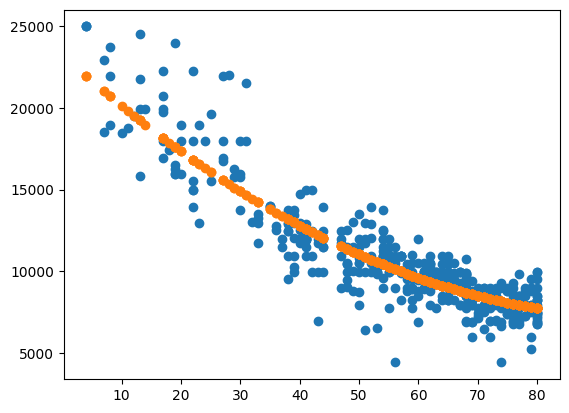

In [54]:
# Plotting the Polynomial regression

import matplotlib.pyplot as plt

plt.scatter(x=df['x0'], y=df['Original Price'])
plt.scatter(x=df['x0'], y=df['Predicted Price'])

## Decision Tree

In [55]:
target = 'Price'
predictor = ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

x = dataforML_numeric[predictor].values
y = dataforML_numeric[target].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=7)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [56]:
from sklearn.tree import DecisionTreeRegressor

regModel = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
DT = regModel.fit(x_train, y_train)

prediction = DT.predict(x_test)
df = pd.DataFrame(data=x_test, columns=predictor)
df['Original '+ target] = y_test
df['Predicted '+ target] = np.round(prediction)
print(df.head())

print('')

df['APE'] = abs((df['Original '+ target] - df['Predicted '+ target])/df['Original '+ target]) * 100
print(df.head())

print('')

MAPE = np.round(np.mean(df['APE']),1)
medianAPE = np.round(np.median(df['APE']),1)

meanAccuracy = 100 - MAPE
medianAccuracy = 100 - medianAPE

print('The mean accuracy of APE is', meanAccuracy)
print('The median accracy of APE is', medianAccuracy)


    Age        KM  Weight     HP  MetColor      CC  Doors  Original Price  \
0  59.0   36954.0  1050.0  110.0       1.0  1600.0    3.0            8900   
1  69.0   44826.0  1075.0  110.0       0.0  1600.0    5.0            8250   
2  74.0  120196.0  1050.0  110.0       1.0  1600.0    3.0            7750   
3  32.0   29198.0  1060.0   97.0       1.0  1400.0    5.0           12995   
4  70.0   68000.0  1045.0   86.0       1.0  1300.0    3.0            8950   

   Predicted Price  
0           9346.0  
1           7928.0  
2           7928.0  
3          16217.0  
4           7928.0  

    Age        KM  Weight     HP  MetColor      CC  Doors  Original Price  \
0  59.0   36954.0  1050.0  110.0       1.0  1600.0    3.0            8900   
1  69.0   44826.0  1075.0  110.0       0.0  1600.0    5.0            8250   
2  74.0  120196.0  1050.0  110.0       1.0  1600.0    3.0            7750   
3  32.0   29198.0  1060.0   97.0       1.0  1400.0    5.0           12995   
4  70.0   68000.0  1045.0

In [57]:
# R2 score
from sklearn.metrics import r2_score
r2Score = r2_score(y_train, DT.predict(x_train))
print(f'The R2 score is: {np.round(r2Score,2)}')

The R2 score is: 0.85


<Axes: >

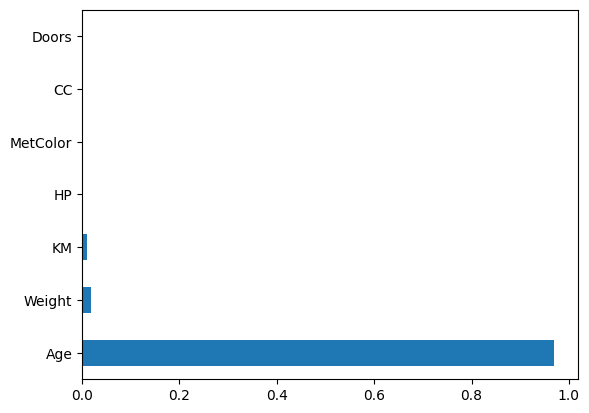

In [58]:
# Getting the most important predictors
imp_pred = pd.Series(DT.feature_importances_, index=predictor)
imp_pred.nlargest(10).plot(kind='barh')

In [59]:
# K fold cross validation

# Firstly we will define a function to calculate the accuracy
def accuracy(original, predicted):
    MAPE = np.mean(100 * abs((original - predicted)/original))
    return(100 - MAPE)


# After that we will make a custom scorer to get the cross validation score
from sklearn.metrics import make_scorer
customScorer = make_scorer(accuracy, greater_is_better=True)


# Running the k fold cross validation 
from sklearn.model_selection import cross_val_score
crossValScore = cross_val_score(regModel, x, y, cv=10, scoring=customScorer)
print(crossValScore)
print('The final average cross validation score is',np.round(np.mean(crossValScore),1))

[83.83497421 87.54092648 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]
The final average cross validation score is 87.9


In [61]:
# Plotting decision tree

import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Asus/anaconda3/Library/bin'

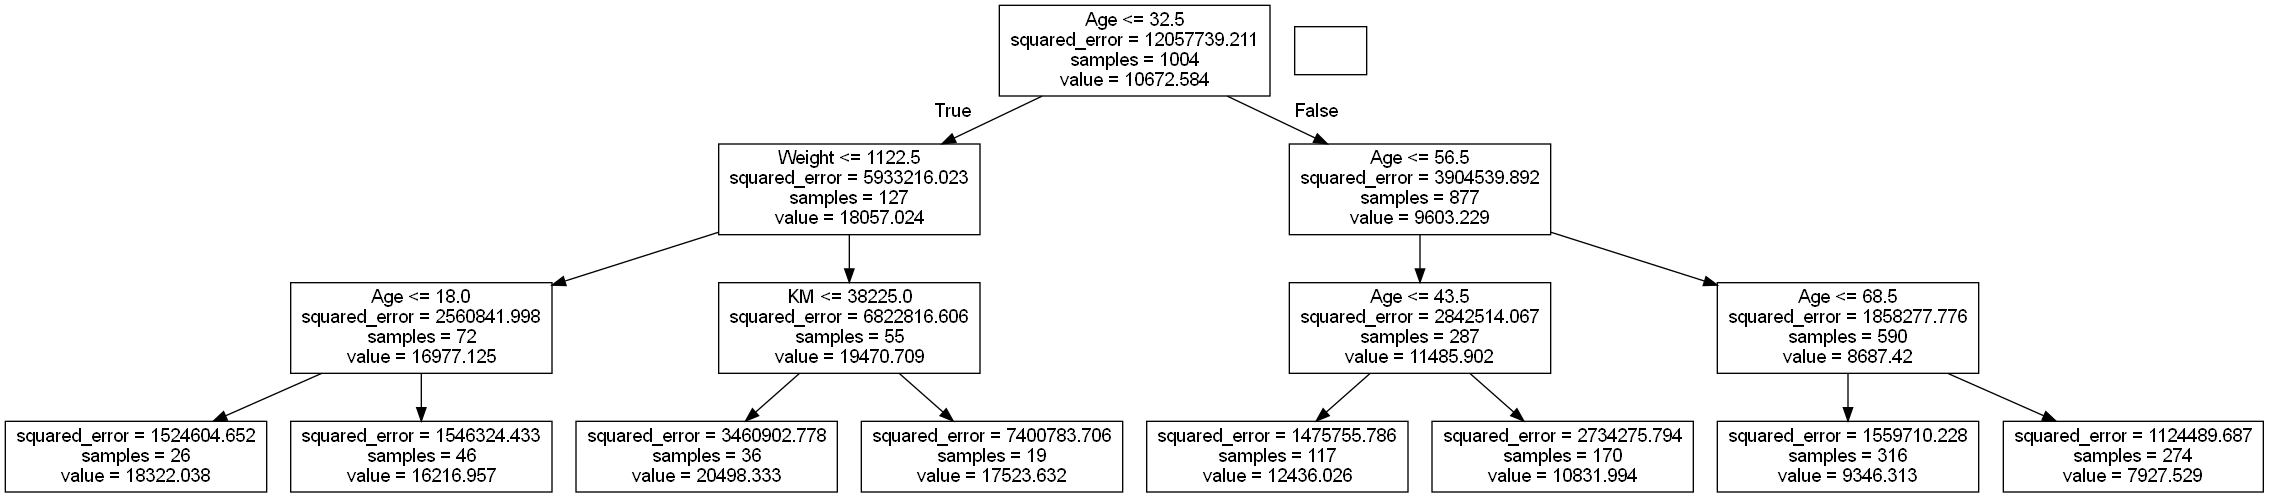

In [64]:
from IPython.display import Image
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(regModel, out_file=None, feature_names=predictor, class_names=target)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())